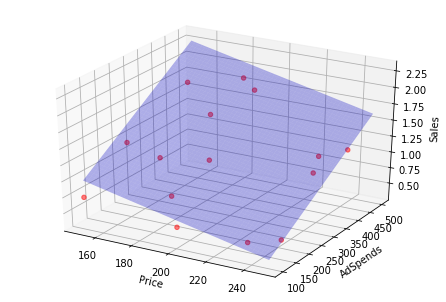

In [2]:
import numpy as np
X= [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
Y= [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]




## Prepare the Dataset

import pandas as pd
df2=pd.DataFrame(X,columns=['Price','AdSpends'])
df2['Sales']=pd.Series(Y)
df2


## Apply multiple Linear Regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import statsmodels.formula.api as smf
model = smf.ols(formula='Sales ~ Price + AdSpends', data=df2)
results_formula = model.fit()
results_formula.params



## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(df2.Price.min(), df2.Price.max(), 100),np.linspace(df2.AdSpends.min(), df2.AdSpends.max(), 100))
onlyX = pd.DataFrame({'Price': x_surf.ravel(), 'AdSpends': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)



## convert the predicted result in an array
fittedY=np.array(fittedY)




# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Price'],df2['AdSpends'],df2['Sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSpends')
ax.set_zlabel('Sales')
plt.show()